Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
\Image Shape (784,) ---> (28, 28)


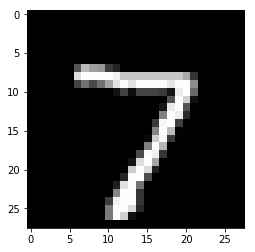

In [1]:
# Mnist  Data 을 다운받습니다
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

sample_image = mnist.test.images[0]
res_sample_image = sample_image.reshape((28,28))
print('\Image Shape {} ---> {}'.format(sample_image.shape , res_sample_image.shape))
plt.imshow(res_sample_image , cmap='gray')
plt.show()

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

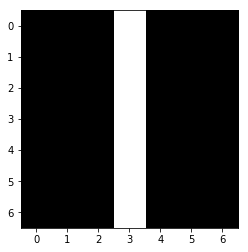

In [3]:
# 0번째 필터 
# 세로의 특징을 추출하는 Filter 
plt.imshow(fmap[:, :, 0, 0] , cmap='gray')
plt.show()

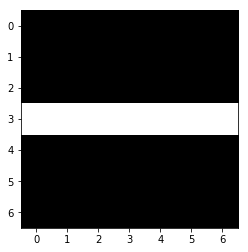

In [4]:
# 1번째 필터
# 가로의 특징을 추출하는 Filter 
plt.imshow(fmap[:, :, 0, 1] , cmap='gray')
plt.show()

# Convolution Layer

In [5]:
# Tensorflow 모듈 불러오기 
import tensorflow as tf

In [6]:
# 입력 노드 만들기 
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
# 위에서 만들었던 feature map 을 tensor node 에 집어 넣습니다.
feature_maps = tf.constant(fmap)
# Convolution 연산을 합니다.
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [7]:
sess = tf.Session()
tf_sample_image = res_sample_image.reshape((1,28,28,1))
print('Matrix Shape {} ---> {}'.format(res_sample_image.shape , tf_sample_image.shape))
output = sess.run(convolution ,feed_dict={X: tf_sample_image})

Matrix Shape (28, 28) ---> (1, 28, 28, 1)


output 1 shape :  (28, 28)


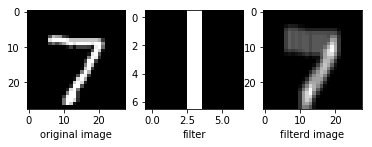

In [8]:
output_1 = output[0,:,:,0]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 0] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('output 1 shape : ',output_1.shape)
plt.show()

output 2 shape :  (28, 28)


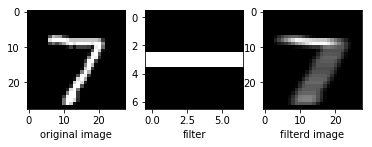

In [9]:
output_2 = output[0,:,:,1]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 1] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_2,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('output 2 shape : ',output_2.shape)
plt.show()

# Convolution Stride

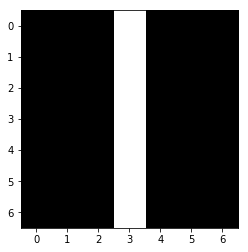

In [10]:
# 우리는 이미지의 특징을 추출하는 이런 filter 을 만드는 것이 목표입니다!!
plt.imshow(fmap[:, :, 0, 0] , cmap='gray')
plt.show()

In [11]:
tf.reset_default_graph()
# 입력 노드 만들기 
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
# 위에서 만들었던 feature map 을 tensor node 에 집어 넣습니다.
feature_maps = tf.constant(fmap)
# Convolution 연산을 합니다.
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,2,2,1], padding="SAME")

In [12]:
sess = tf.Session()
tf_sample_image = res_sample_image.reshape((1,28,28,1))
print('Matrix Shape {} ---> {}'.format(res_sample_image.shape , tf_sample_image.shape))
output = sess.run(convolution ,feed_dict={X: tf_sample_image})

Matrix Shape (28, 28) ---> (1, 28, 28, 1)


stride 2 output Image shape :  (14, 14)


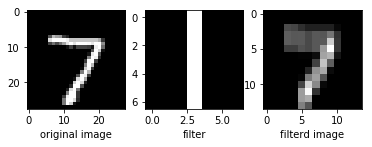

In [13]:
output_1 = output[0,:,:,0]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 0] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('stride 2 output Image shape : ',output_1.shape)
plt.show()

output 2 shape :  (14, 14)


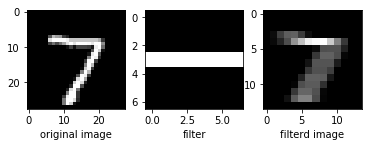

In [14]:
output_2 = output[0,:,:,1]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 1] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_2,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('output 2 shape : ',output_2.shape)
plt.show()

# Pooling Layer (Max Pooling)

In [15]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,2,2,1], padding="SAME")
maxpool = tf.nn.max_pool(convolution , ksize = [1,2,2,1] , strides= [1,2,2,1] , padding='VALID')

In [16]:
sess = tf.Session()
tf_sample_image = res_sample_image.reshape((1,28,28,1))
print('Matrix Shape {} ---> {}'.format(res_sample_image.shape , tf_sample_image.shape))
output = sess.run(maxpool ,feed_dict={X: tf_sample_image})

Matrix Shape (28, 28) ---> (1, 28, 28, 1)


stride 2 output Image shape :  (7, 7)


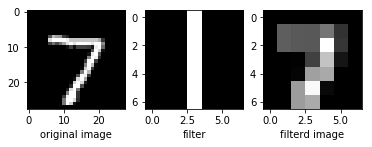

In [17]:
output_1 = output[0,:,:,0]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 0] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('stride 2 output Image shape : ',output_1.shape)
plt.show()

stride 2 output_2 Image shape :  (7, 7)


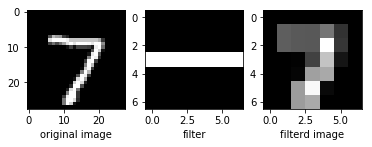

In [18]:
output_2 = output[0,:,:,1]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 1] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('stride 2 output_2 Image shape : ',output_2.shape)
plt.show()

# Pooling Layer (Average Pooling)

In [19]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,2,2,1], padding="SAME")
maxpool = tf.nn.avg_pool(convolution , ksize = [1,2,2,1] , strides= [1,2,2,1] , padding='VALID')

In [20]:
sess = tf.Session()
tf_sample_image = res_sample_image.reshape((1,28,28,1))
print('Matrix Shape {} ---> {}'.format(res_sample_image.shape , tf_sample_image.shape))
output = sess.run(maxpool ,feed_dict={X: tf_sample_image})

Matrix Shape (28, 28) ---> (1, 28, 28, 1)


stride 2 output Image shape :  (7, 7)


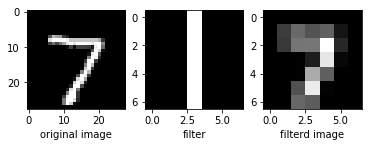

In [21]:
output_1 = output[0,:,:,0]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 0] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('stride 2 output Image shape : ',output_1.shape)
plt.show()

stride 2 output_2 Image shape :  (7, 7)


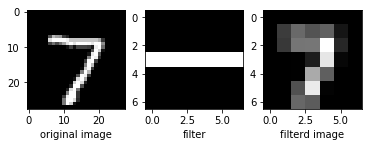

In [22]:
output_2 = output[0,:,:,1]
fig = plt.figure()

ax = fig.add_subplot(1,3,2)
ax.imshow(fmap[:, :, 0, 1] , cmap='gray')
ax.set_xlabel('filter')

ax = fig.add_subplot(1,3,3)
ax.imshow(output_1,cmap='gray')
ax.set_xlabel('filterd image')

ax = fig.add_subplot(1,3,1)
ax.imshow(res_sample_image,cmap='gray')
ax.set_xlabel('original image')

print('stride 2 output_2 Image shape : ',output_2.shape)
plt.show()